# **IME692 : 2021-22-1**




# **Project**
# **Group 5**







# Importing Dataset

In [38]:
#Importing initial libraries
import numpy as np
import pandas as pd

In [39]:
#Reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/AlphaCentauri04/Covid-Vax-Disparity/main/ime692_project.csv")

# Extracting the Test and Train Datasets

**Data points with Test = 0 are used for test dataset while others are used for training**

In [40]:
#Splitting the dataset
train = df[df['Test']==0]
test = df[df['Test']==1]

In [41]:
#Shape of Training and Test Data
print("No of Training datapoints : ", train.shape[0])
print("No of Test datapoints : ", test.shape[0])

No of Training datapoints :  531
No of Test datapoints :  225


In [42]:
#Dropping the test colum from both the datasets
train = train.drop('Test',1)
test = test.drop('Test',1)

In [43]:
#First 10 rows of the data
train.head(10)

,State,County,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop
0,California,Alameda,91.4,88.4,99.406,1770.559475,49.890444,1,33.258827,9,5.7,10.7,62.678,16.768796,90.4,0.017292,5.114553,11.031221
1,California,Butte,89.1,89.2,52.537,4775.484604,62.099507,1,36.520664,13,0.7,6.4,24.189,13.494706,92.8,0.017793,5.288203,1.897019
2,California,Colusa,86.5,71.3,59.401,5726.667504,19.219010,0,37.223305,14,18.7,-0.6,39.137,15.707145,94.6,0.018564,10.205597,1.308767
4,California,Del Norte,84.0,80.1,45.283,5641.809291,35.769303,0,36.879187,15,21.5,-12.6,-57.687,23.012579,90.4,0.028765,4.631094,3.523659
5,California,El Dorado,90.1,93.4,83.377,5324.527717,58.879477,1,36.525529,10,8.4,3.6,-4.821,7.449124,95.9,0.017112,5.069927,1.037113
8,California,Imperial,84.2,69.7,47.622,3675.552735,52.889216,1,38.442943,14,18.7,13.8,37.583,28.909331,92.6,0.017659,15.446293,3.315951
10,California,Kings,82.5,73.4,57.848,5488.622372,31.015355,1,37.341838,16,12.6,6.2,22.659,12.748377,93.6,0.022885,14.892768,7.465019
12,California,Los Angeles,86.9,79.1,68.044,2686.865991,57.098106,1,37.546340,11,5.1,9.9,39.215,11.532519,91.0,0.015420,12.245392,8.956633
14,California,Marin,93.2,93.3,115.246,1579.707447,49.691672,1,33.916140,8,13.8,6.3,77.899,25.825346,95.1,0.018932,5.356881,2.841677
19,California,Orange,92.5,85.5,90.234,4445.599566,46.052747,1,38.558153,9,4.0,2.9,25.822,14.698260,95.6,0.017225,8.471728,2.142557


# Data Visualization and Analysis



The dataset has **18** features
      

*   **State**  - State in which the county is located
*   **County** - County name
*   **IT_WholeRate** - County level computer ownership and internet subscription data (in percentage)
*   **HighSchool_WholeRate** - County level education data. Percentage of population that qualifies as a high school graduate or higher
*   **MedianInc_WholeAvg** - County-level household median income data
*   **republican_rate** - The share of votes cast for the Republican candidate in the 2020 election
*   **Segregation** - Black-White segregation index measures. This index ranges from 0 (complete integration) to 100 complete segregation
*   **urban** - A dummy-coded variable representing whether a county is considered urban or rural.
*  **racial_weighted_bias** - Measure indicating implicit racial bias in a county. Larger values indicate greater bias against Blacks.
*  **hesitancy** - Survey response for overall vaccine hesitancy in a county
*  **HighSchool_Disparity** - 
Difference in county level high school education between White and Black population
* **IT_Disparity** - 
Difference in county level computer ownership and internet subscription between White and Black population
* **MedianInc_Disparity**
Difference in county level median income between White and Black population
* **CvdVax_DisparityY**
Difference in the Covid-19 vaccination rate (first dose) between White and Black residents in a County (in percentage).
* **vehicle**
Proportion of vehicle ownership in a county
* **FacNumRate**
Number of health care facilities per capita
* **CaseRate** - 
Covid-19 cases per capita
* **Black_Prop** - 
Proportion of black residents in a county



Our task is to estimate the varibale **CvdVax_DisparityY** using the other predictor variables

 











In [44]:
#Verifying the data type of all the variables
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 755
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 531 non-null    object 
 1   County                531 non-null    object 
 2   IT_WholeRate          531 non-null    float64
 3   HighSchool_WholeRate  531 non-null    float64
 4   MedianInc_WholeAvg    531 non-null    float64
 5   republican_rate       531 non-null    float64
 6   Segregation           531 non-null    float64
 7   urban                 531 non-null    int64  
 8   racial_weighted_bias  531 non-null    float64
 9   hesitancy             531 non-null    int64  
 10  HighSchool_Disparity  531 non-null    float64
 11  IT_Disparity          531 non-null    float64
 12  MedianInc_Disparity   531 non-null    float64
 13  CvdVax_DisparityY     531 non-null    float64
 14  vehicle               531 non-null    float64
 15  FacNumRate            5

In [45]:
#Stastical measures for all the variables
train.describe()

,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,82.509793,86.908098,58.030576,5864.938146,44.346174,0.613936,40.041033,17.821092,6.945009,8.394162,20.782945,12.252910,92.943503,0.023406,9.564998,12.912791
std,7.188060,5.438288,15.973654,1582.265641,16.101169,0.487305,1.805298,3.724474,8.117207,10.296824,15.931063,10.358401,4.566330,0.011725,2.610032,13.761940
min,55.600000,61.800000,27.063000,1124.920105,0.040823,0.000000,31.723470,8.000000,-30.300000,-21.900000,-67.705000,-18.168016,41.500000,0.000000,2.234984,0.715784
25%,78.550000,83.850000,48.173500,4823.182677,32.821602,0.000000,39.257688,15.000000,2.600000,2.500000,13.728000,5.122240,91.800000,0.016640,7.751350,3.269803
50%,83.300000,87.900000,54.600000,5899.916597,45.224639,1.000000,40.177759,18.000000,6.400000,7.800000,22.040000,10.555013,93.600000,0.020915,9.535410,7.469841
75%,87.600000,91.000000,63.396500,7137.218098,56.258105,1.000000,40.939102,20.000000,10.800000,14.350000,29.536000,18.163206,95.200000,0.026443,11.205918,17.834525
max,96.000000,96.800000,142.299000,8932.443703,83.066207,1.000000,44.452995,27.000000,42.200000,64.200000,77.899000,50.282689,98.600000,0.098090,24.159065,76.973139


**Checking for missing values**

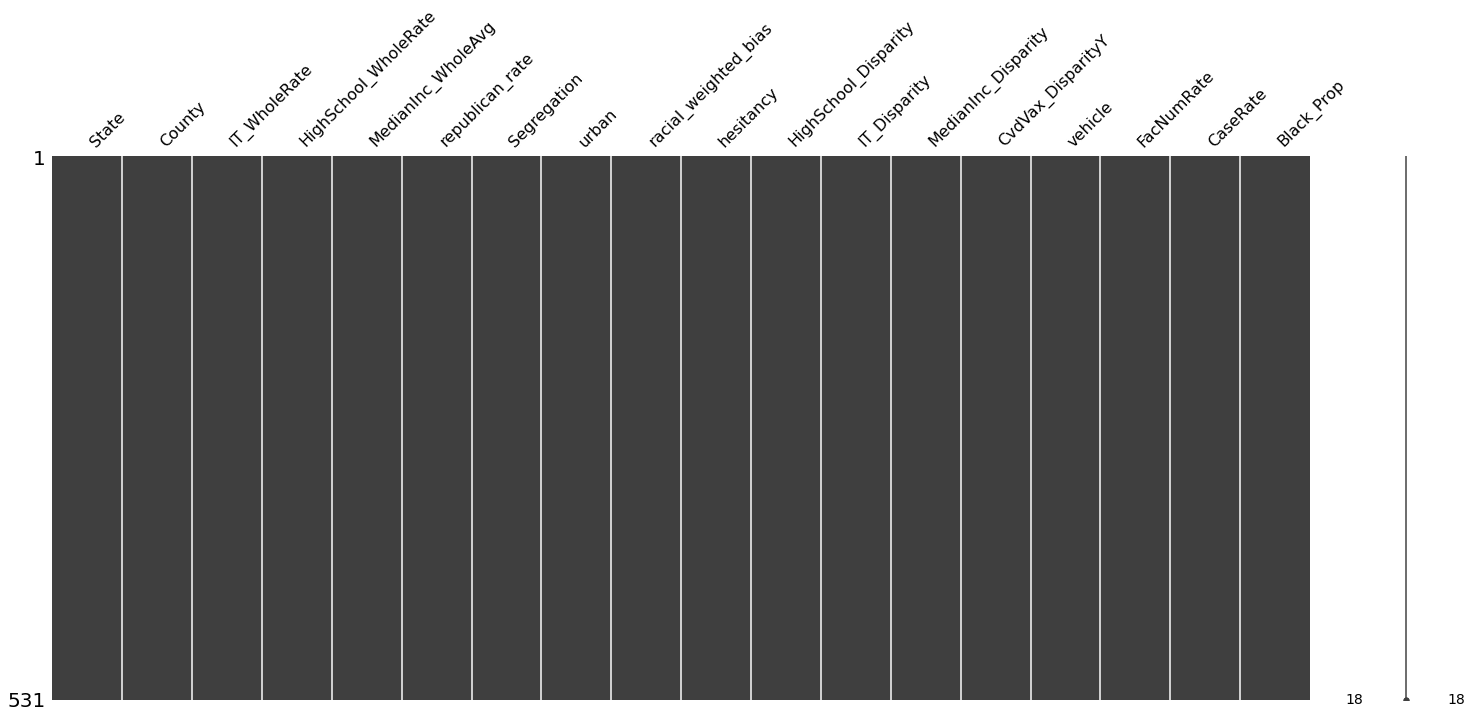

In [46]:
import missingno as misno

misno.matrix(train)

**There are no missing values in the dataset**

# Bar Plots and Correlation Heat Map

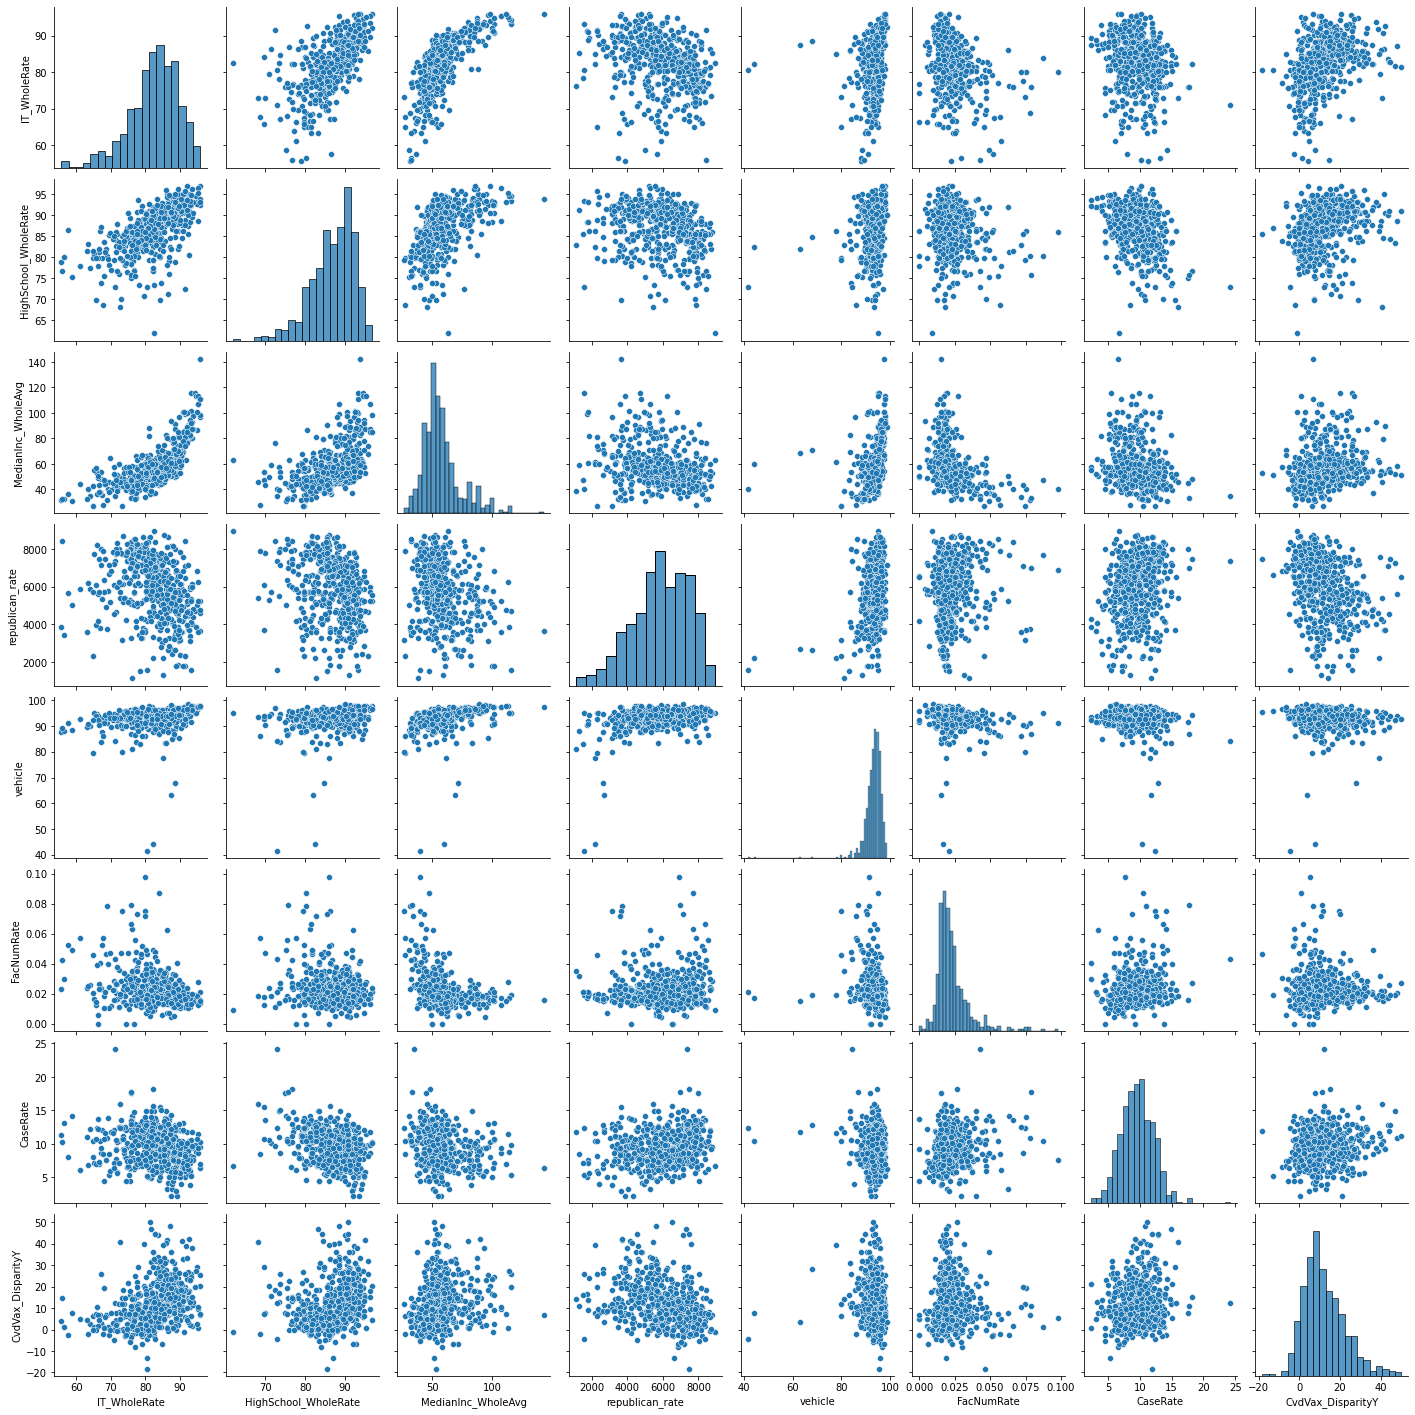

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(train[['IT_WholeRate'	,'HighSchool_WholeRate'	,'MedianInc_WholeAvg'	,'republican_rate','vehicle'	,'FacNumRate'	,'CaseRate','CvdVax_DisparityY']])

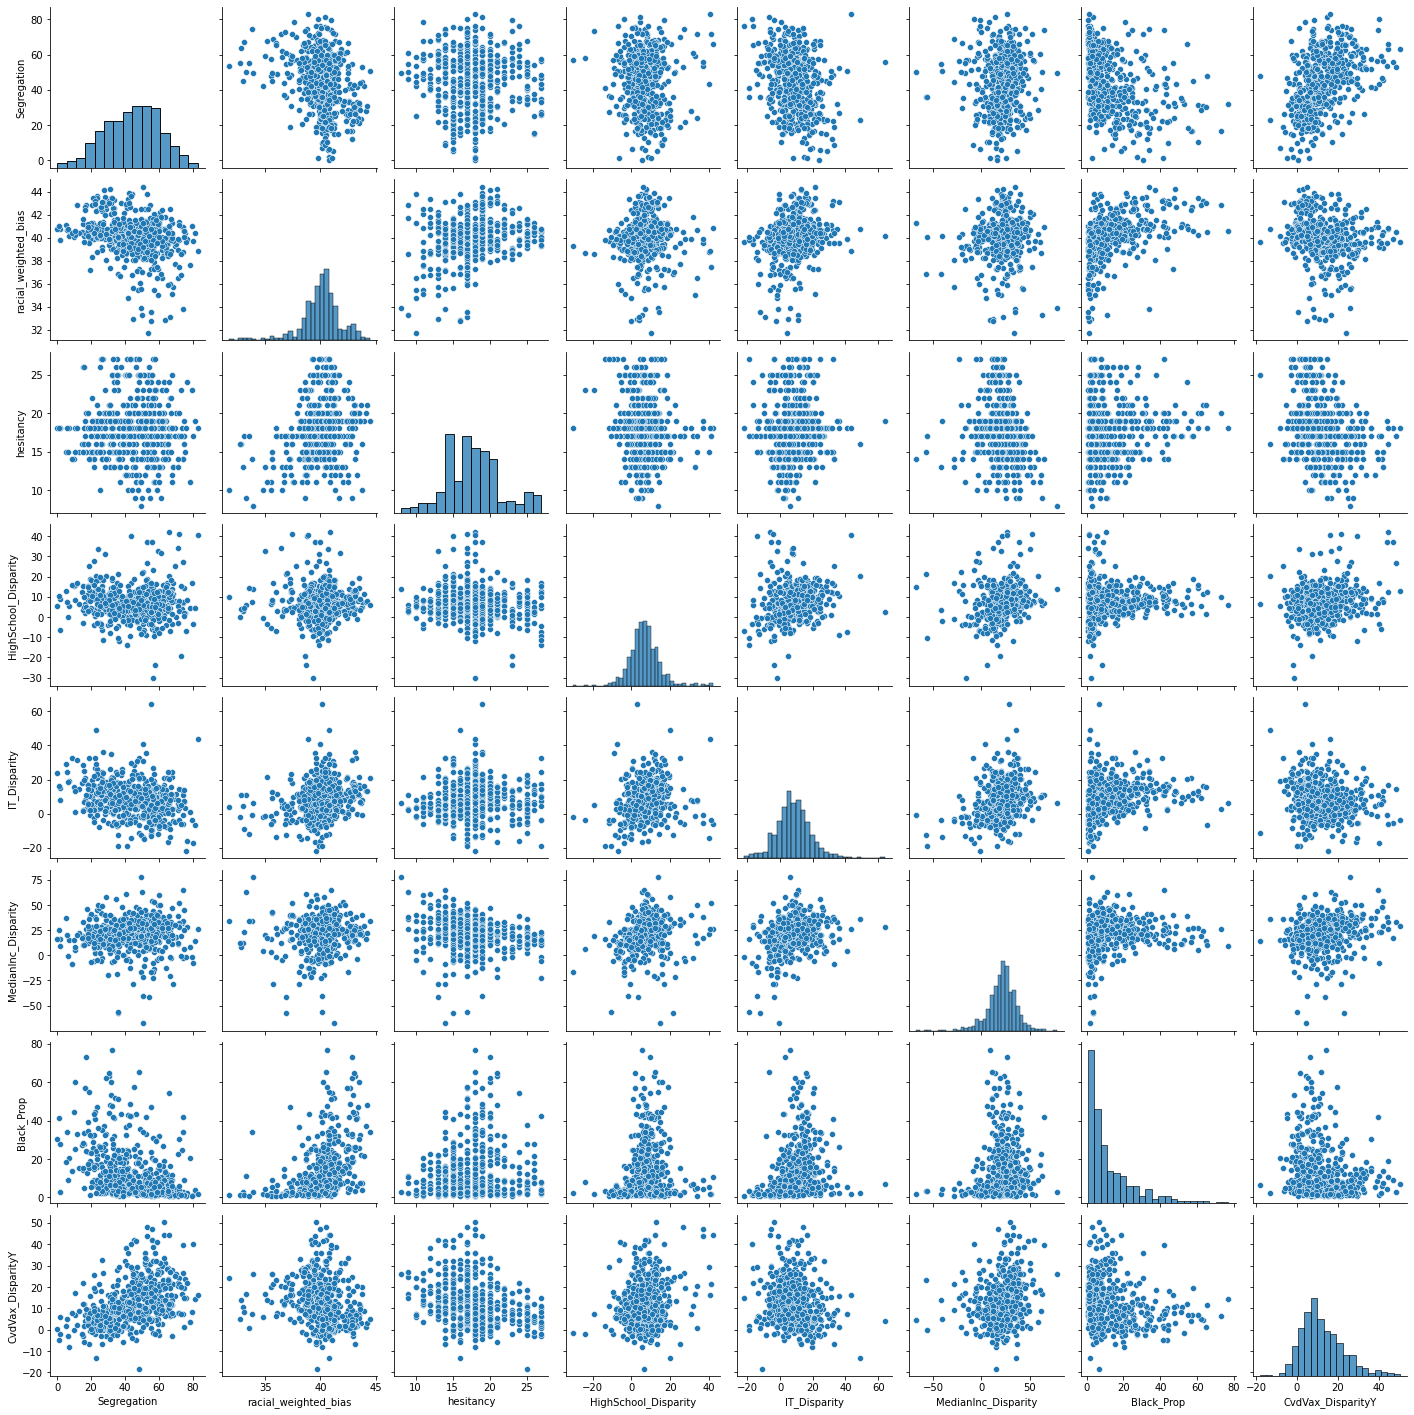

In [48]:
g = sns.pairplot(train[['Segregation'	,'racial_weighted_bias',	'hesitancy',	'HighSchool_Disparity',	'IT_Disparity',	'MedianInc_Disparity','Black_Prop','CvdVax_DisparityY']])


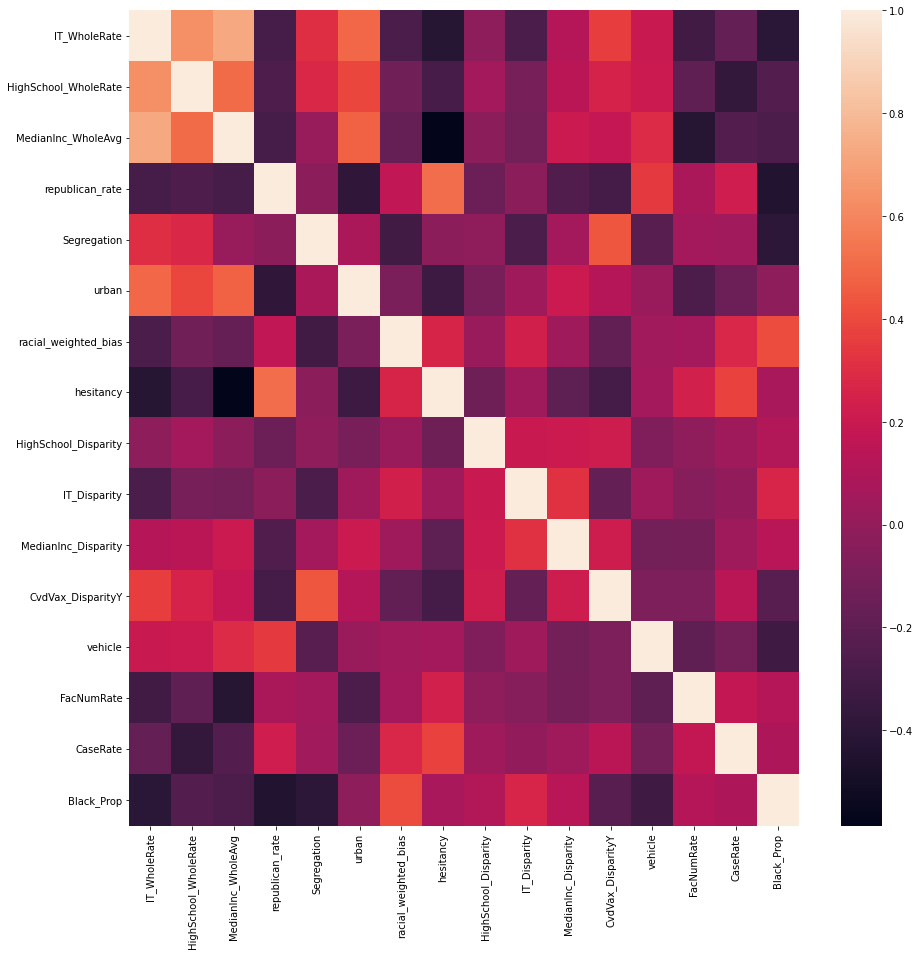

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(15,15)
hmap = train.drop(['State','County'],axis = 1)
sns.heatmap(hmap.corr())

In the preliminary analysis we can observe that : 


*   **IT_WholeRate**, **HighSchool_WholeRate**, **MedianInc_WholeAvg** are highly correlated to each other 
*   **CvdVax_Disparity** seems to be related to factors of social welfare like **IT_WholeRate** and **MedianInc_WholeAvg**
*   It is also related to measure of **Segregation** and percentage of **Black Population** and the disparity in **High School** and **Income** rates
*   Interestingly the covid disparity also seems to be negatively correlated to the **republican_rate**

These observations are in line with the results of the study publihsed.


**State Wise Covid Vaccine Disparity Data**

In [50]:
State_data = train.groupby('State').agg('mean')
State_data = State_data.sort_values('CvdVax_DisparityY')
State_data


,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop
State,,,,,,,,,,,,,,,,
North Carolina,82.157143,86.271429,52.736429,5423.089210,38.011010,0.642857,41.109431,18.571429,6.421429,11.789286,23.867857,4.768164,94.028571,0.020977,8.980247,19.569406
Virginia,80.115000,86.690000,61.343300,5179.105573,27.398490,0.637500,40.489959,16.025000,9.275000,11.968750,18.267737,5.554123,93.082500,0.023493,8.066441,23.489435
South Carolina,74.757576,83.684848,43.903636,5183.824036,29.699042,0.454545,43.010674,19.090909,8.587879,14.557576,23.057000,6.001065,91.978788,0.028591,10.914090,38.643310
Tennessee,80.027660,85.131915,50.229426,7160.825365,43.067780,0.468085,40.267264,25.085106,3.080851,8.125532,16.466787,6.024033,94.325532,0.028817,12.639736,10.714531
Oregon,88.666667,90.883333,58.686833,4664.959598,58.764729,0.666667,33.523028,16.166667,3.150000,-3.683333,14.508667,7.480229,93.300000,0.022344,3.803159,1.280972
West Virginia,80.283333,85.550000,47.919667,7133.918643,54.861416,0.416667,39.192589,20.333333,-2.666667,2.083333,9.869833,8.391749,91.283333,0.049557,8.885948,3.560110
Texas,80.516327,83.395918,57.094969,7060.557466,39.588758,0.530612,40.040148,17.989796,5.105102,12.261224,21.811429,9.211231,94.723469,0.019639,9.877526,10.661489
Ohio,84.911905,90.166667,57.099381,6174.607263,53.839989,0.619048,40.436323,21.952381,6.104762,5.533333,18.152167,12.022804,92.950000,0.021803,8.933064,6.502491
Maine,87.733333,92.583333,58.159500,4540.278848,65.444070,0.666667,36.662401,12.333333,8.200000,2.350000,6.761500,13.199927,92.683333,0.034366,4.144959,1.516586


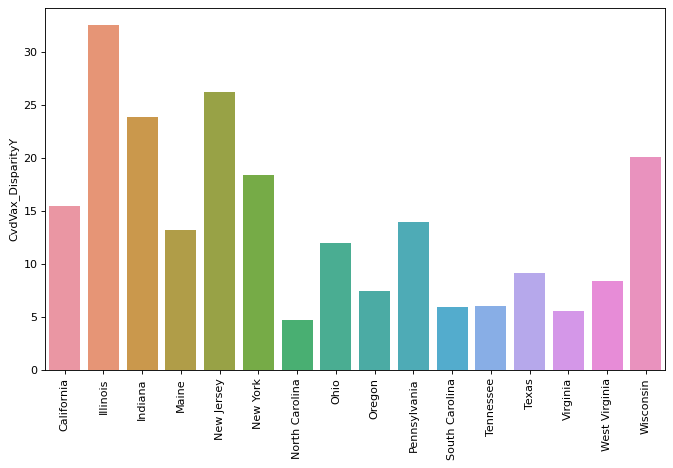

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6), dpi=80)
ax = sns.barplot(x = train.State.unique().tolist(), y = train.groupby('State').agg('mean')['CvdVax_DisparityY'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

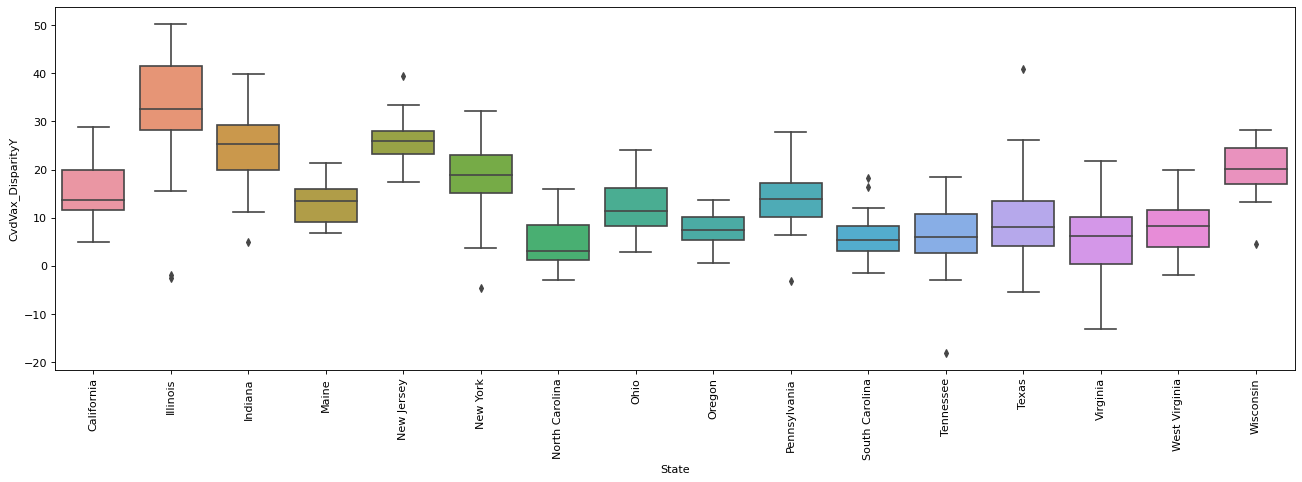

In [52]:
plt.figure(figsize=(20, 6), dpi=80)
ax = sns.boxplot(x="State", y="CvdVax_DisparityY", data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

The state of **Illinois** has the highest average covid vaccine disparity while **North Carolina** has the lowest

**Urban vs Rural Data**

In [53]:
urban_data = train.groupby('urban').agg('mean')
urban_data

,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop
urban,,,,,,,,,,,,,,,
0,78.045854,84.240488,48.470302,6634.039867,42.665827,40.255957,19.370732,7.946829,7.939512,16.698195,10.611549,92.814634,0.027339,10.047520,13.187425
1,85.316871,88.585583,64.042405,5381.300561,45.402834,39.905881,16.846626,6.315031,8.680061,23.351577,13.285054,93.024540,0.020933,9.261572,12.740091


**The urban nature of county doesn't seem to affect the Covid Vaccine Disparity**

In [54]:
training_data = train.drop(['State','County'],axis = 1)
testing_data = test.drop(['State','County'],axis = 1)
training_data

,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop
0,91.4,88.4,99.406,1770.559475,49.890444,1,33.258827,9,5.7,10.7,62.678,16.768796,90.4,0.017292,5.114553,11.031221
1,89.1,89.2,52.537,4775.484604,62.099507,1,36.520664,13,0.7,6.4,24.189,13.494706,92.8,0.017793,5.288203,1.897019
2,86.5,71.3,59.401,5726.667504,19.219010,0,37.223305,14,18.7,-0.6,39.137,15.707145,94.6,0.018564,10.205597,1.308767
4,84.0,80.1,45.283,5641.809291,35.769303,0,36.879187,15,21.5,-12.6,-57.687,23.012579,90.4,0.028765,4.631094,3.523659
5,90.1,93.4,83.377,5324.527717,58.879477,1,36.525529,10,8.4,3.6,-4.821,7.449124,95.9,0.017112,5.069927,1.037113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,83.3,93.7,53.986,4439.702475,73.099649,1,36.775647,17,15.1,-6.2,-0.735,20.113383,92.7,0.041715,10.801854,1.253766
752,87.6,90.8,60.652,6476.031146,65.224838,0,35.934490,17,12.3,0.2,26.775,23.430382,94.9,0.013661,14.317103,3.345894
753,91.4,95.8,73.893,2293.396669,49.608129,1,35.577848,14,8.4,9.0,42.958,26.019744,92.7,0.016645,8.236402,5.531969
754,89.8,92.1,62.340,5282.318703,58.983900,1,37.440183,17,12.5,6.1,40.201,26.188287,94.5,0.018145,13.017971,2.976465


# Data Scaling

**Standard Scaling**

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = scaler.fit_transform(training_data)
test_data = scaler.fit_transform(testing_data)

In [56]:
X_train = np.delete(train_data, 11,1 )
Y_train = train_data[:,11]
X_test = np.delete(test_data, 11,1 )
Y_test = test_data[:,11]
features = ['IT_WholeRate','HighSchool_WholeRate','MedianInc_WholeAvg','republican_rate','Segregation','urban','racial_weighted_bias','hesitancy',
            'HighSchool_Disparity','IT_Disparity','MedianInc_Disparity','vehicle','FacNumRate','CaseRate','Black_Prop']

# Data Modelling

**Linear Regression using Sklearn**

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred_lr = model.predict(X_test)

print("Mean Squared Error : ", mean_squared_error(Y_test, Y_pred_lr))
print("R-squared score : ", r2_score(Y_test, Y_pred_lr))

Mean Squared Error :  0.6374290086178926
R-squared score :  0.36257099138210713


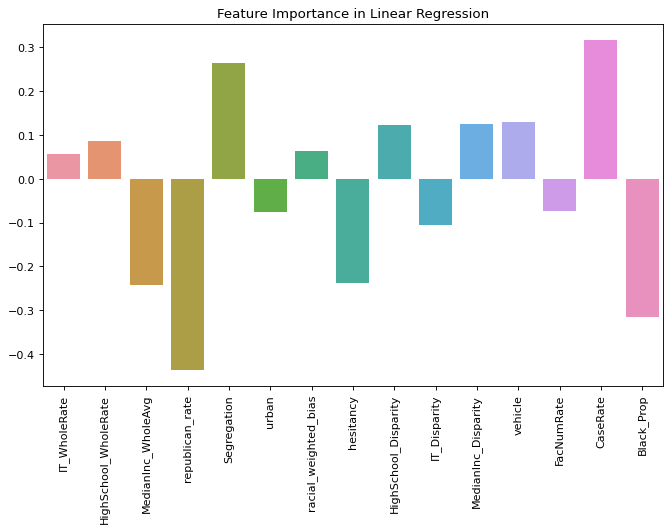

In [58]:
feature_importance = model.coef_.tolist()
plt.figure(figsize=(10, 6), dpi=80)
ax = sns.barplot(x = features, y = feature_importance)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Feature Importance in Linear Regression")
plt.show()

**OLS Regression using statsmodels.api**

In [98]:
import statsmodels.api as sm
model_ols = sm.OLS(Y_train, X_train)
results = model_ols.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.475
Model:                            OLS   Adj. R-squared (uncentered):              0.459
Method:                 Least Squares   F-statistic:                              31.08
Date:                Wed, 13 Oct 2021   Prob (F-statistic):                    1.72e-62
Time:                        09:35:23   Log-Likelihood:                         -582.58
No. Observations:                 531   AIC:                                      1195.
Df Residuals:                     516   BIC:                                      1259.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

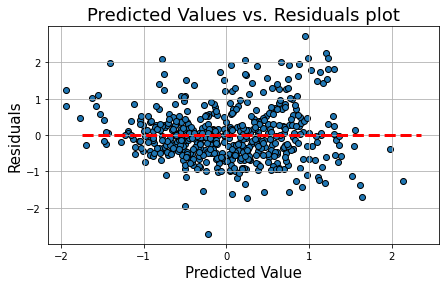

In [99]:
plt.figure(figsize=(7,4))
p=plt.scatter(x=results.fittedvalues,y=results.resid,edgecolor='k')
xmin=min(results.fittedvalues)
xmax = max(results.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Predicted Value",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Predicted Values vs. Residuals plot",fontsize=18)
plt.grid(True)
plt.show()

**Gradient Boost Regression**

In [62]:
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01}
model_gbr = ensemble.GradientBoostingRegressor(**params)
model_gbr.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, model_gbr.predict(X_test))
r2 = r2_score(Y_test, model_gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The R-squared score on test set: {:.4f}".format(r2))

The mean squared error (MSE) on test set: 0.5850
The R-squared score on test set: 0.4150


Plot training deviance

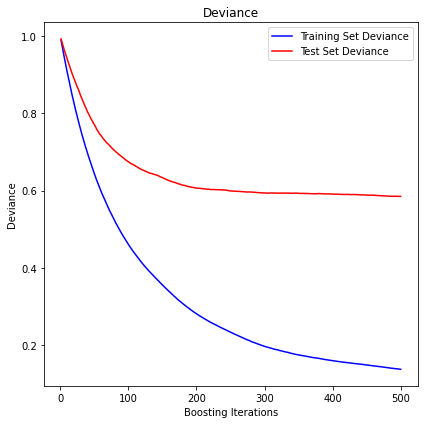

In [63]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, Y_pred in enumerate(model_gbr.staged_predict(X_test)):
    test_score[i] = model_gbr.loss_(Y_test, Y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model_gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

Feature Importance

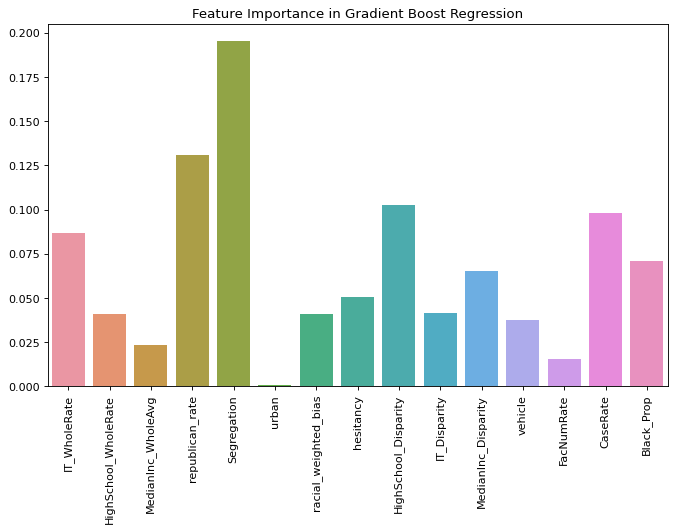

In [150]:
feature_importance_gbr = model_gbr.feature_importances_
plt.figure(figsize=(10, 6), dpi=80)
ax = sns.barplot(x = features, y = feature_importance_gbr)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Feature Importance in Gradient Boost Regression")
plt.show()



**Random Forest Regression**

In [101]:
model_rf = ensemble.RandomForestRegressor(max_depth=3, random_state=142)
model_rf.fit(X_train,Y_train)
mse = mean_squared_error(Y_test, model_rf.predict(X_test))
r2 = r2_score(Y_test, model_rf.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The R-squared error on test set: {:.4f}".format(r2))
estimator = model_rf.estimators_[5]


The mean squared error (MSE) on test set: 0.6614
The R-squared error on test set: 0.3386


In [102]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = features,
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [103]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


0

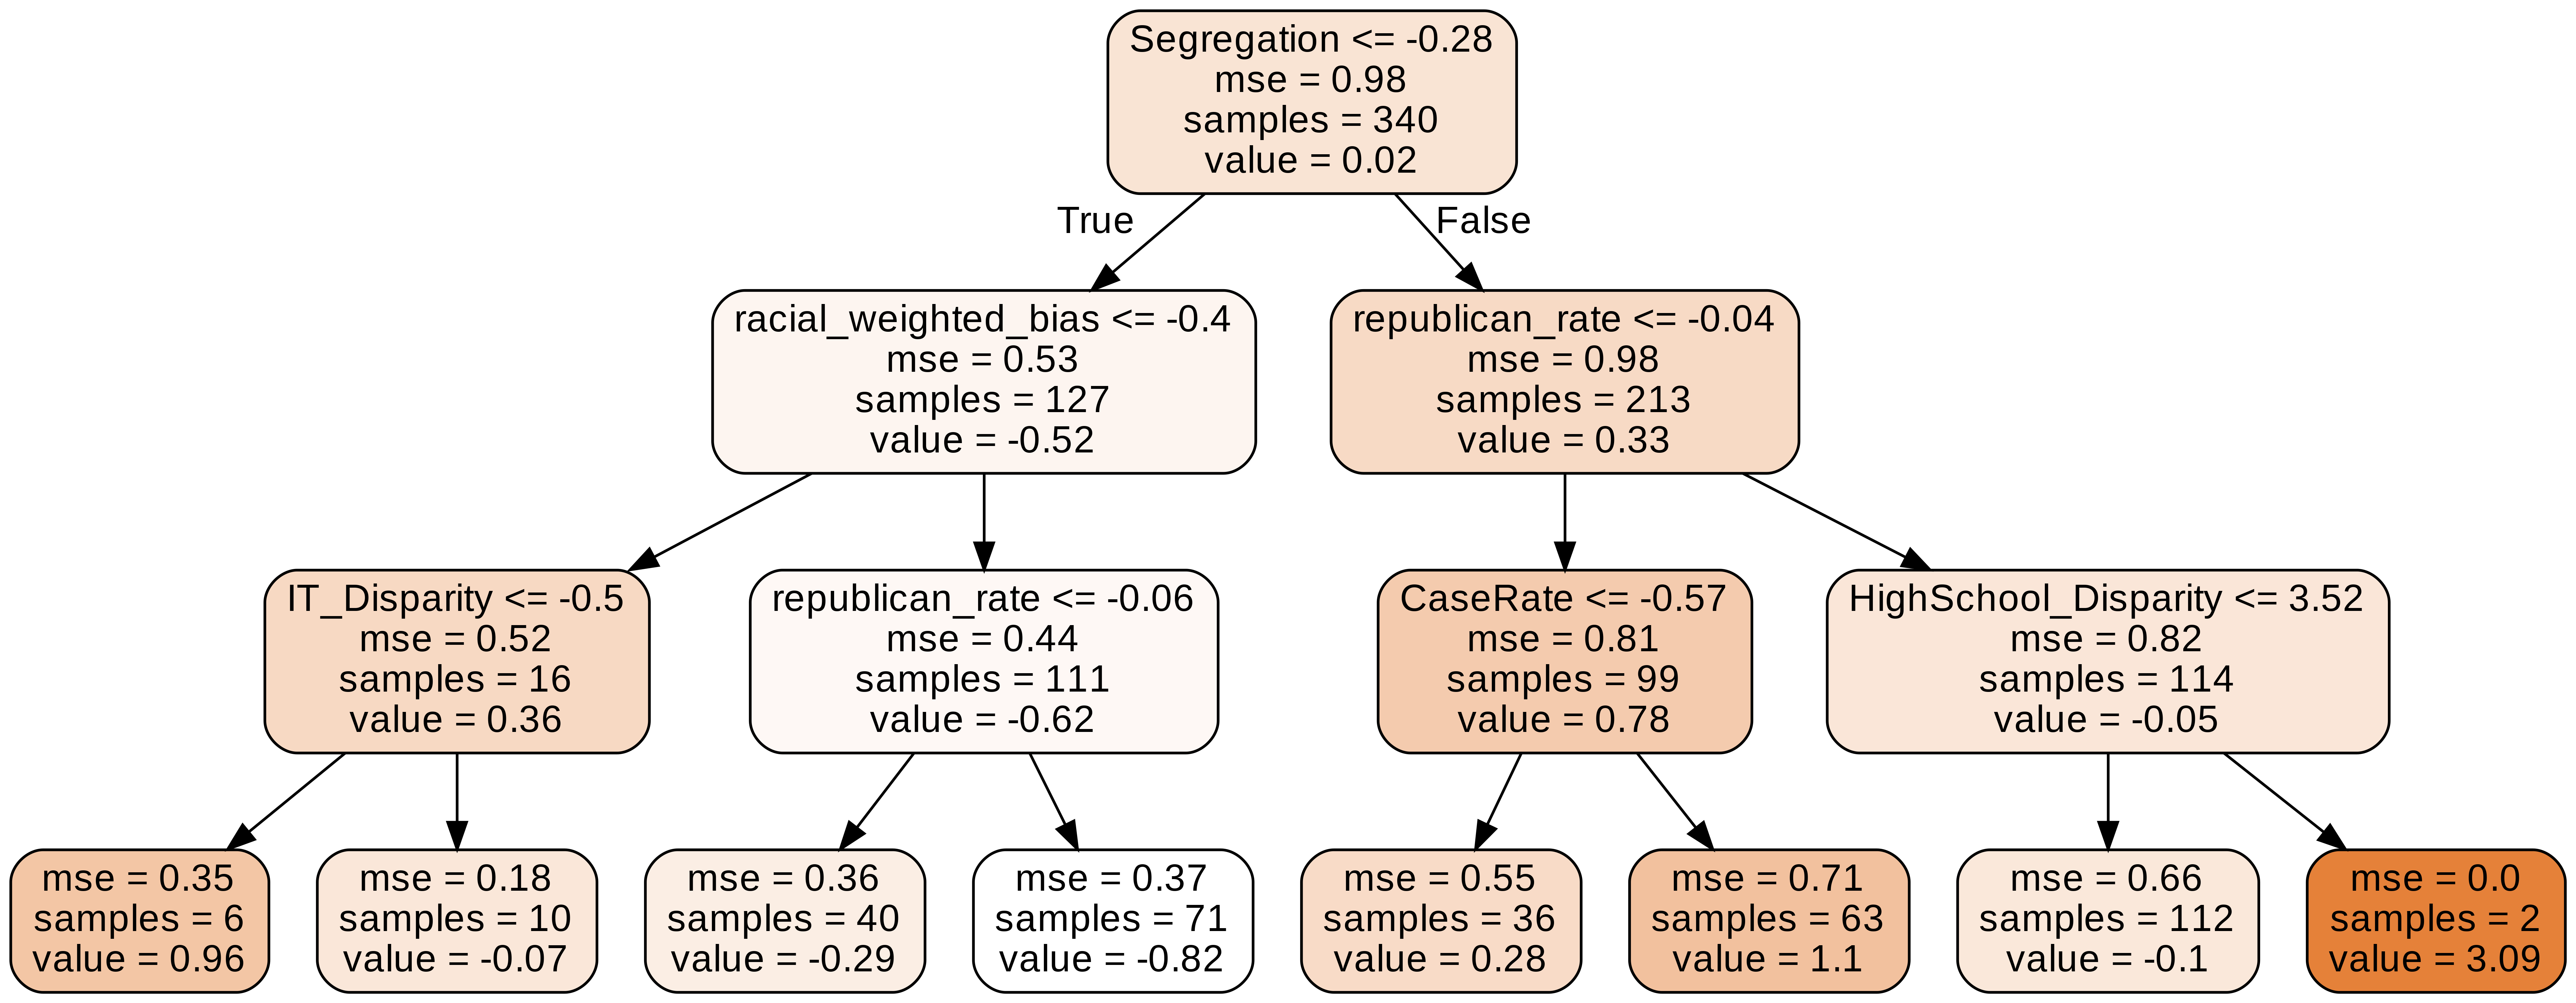

In [104]:
from IPython.display import Image
Image(filename = 'tree.png')

**XGBoost Regression**

In [107]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor( colsample_bytree = 0.5, learning_rate = 0.15,
                max_depth = 3, alpha = 10, n_estimators = 100)
model_xgb.fit(X_train,Y_train)
Y_pred_xgb = model_xgb.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred_xgb)
r2 = r2_score(Y_test, Y_pred_xgb)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The R-squared error on test set: {:.4f}".format(r2))

[09:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The mean squared error (MSE) on test set: 0.5979
The R-squared error on test set: 0.4021


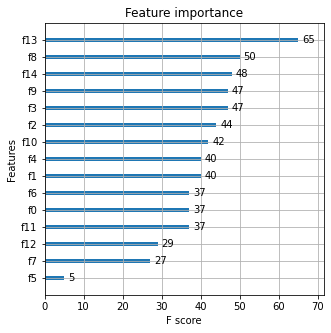

In [108]:
xgb.plot_importance(model_xgb)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

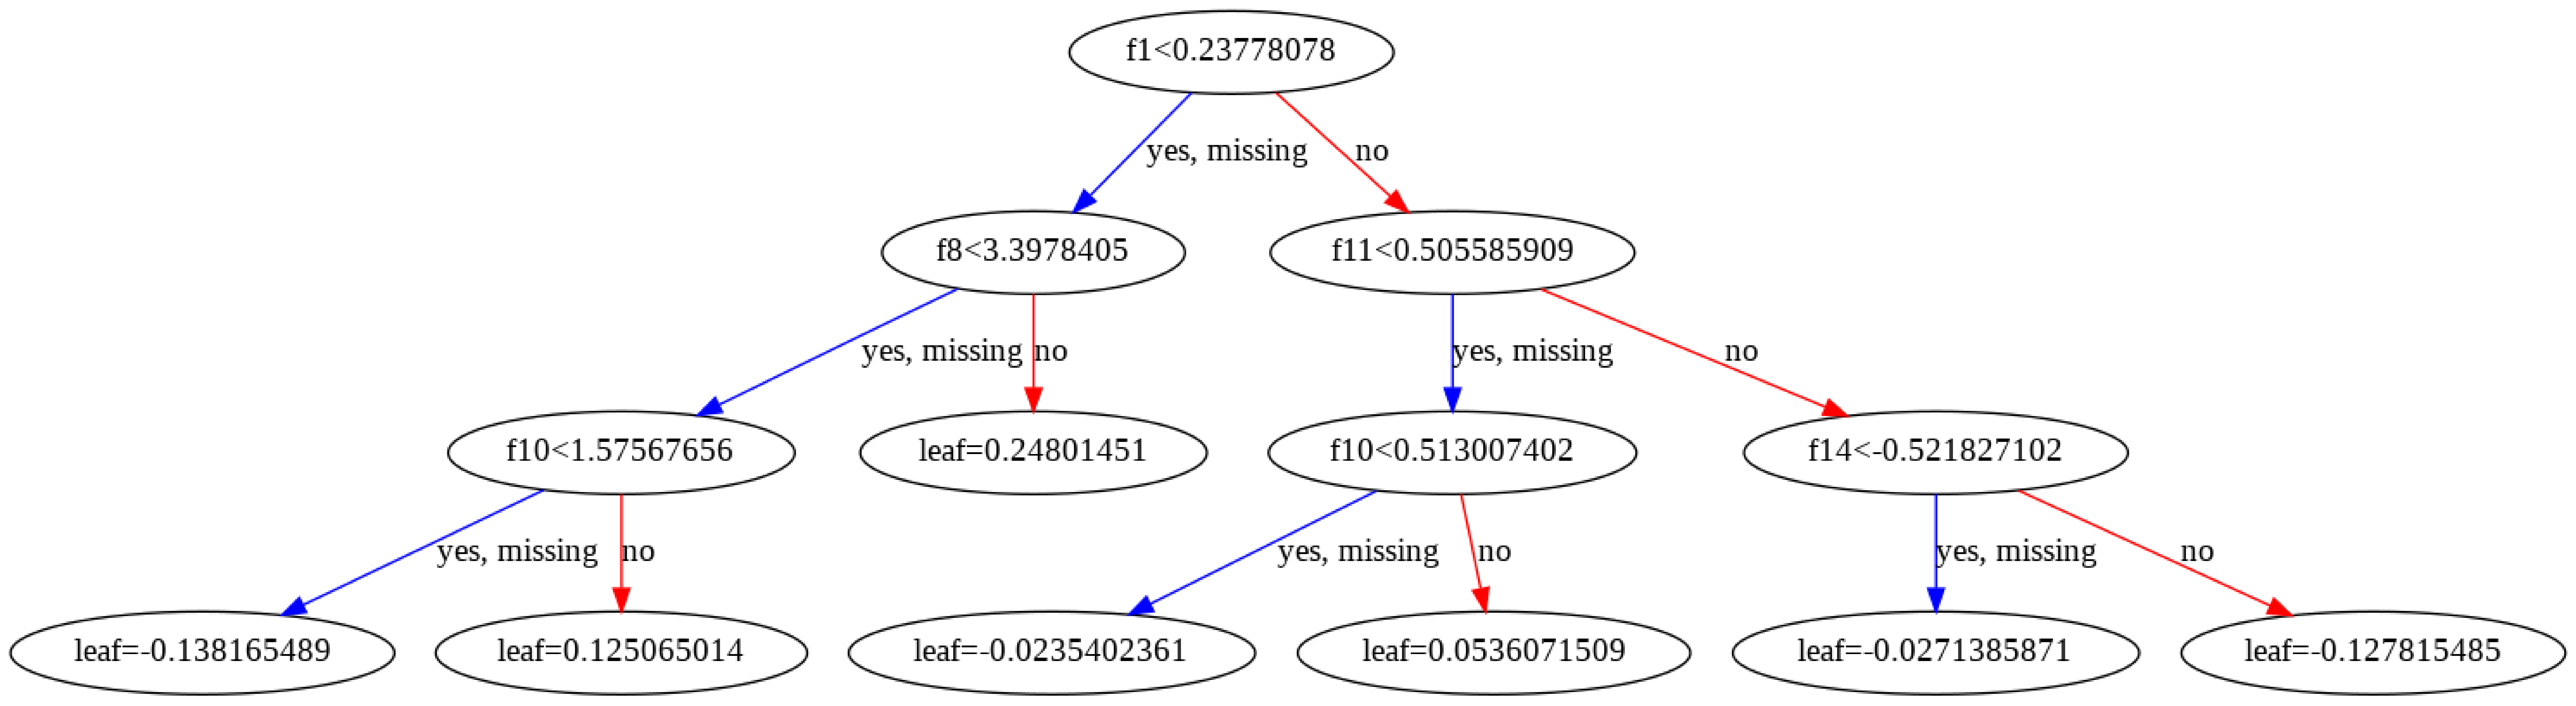

In [110]:
import matplotlib.pyplot as plt

xgb.plot_tree(model_xgb,num_trees=0)
plt.rcParams['figure.figsize'] = [20, 50]
plt.show()

**Support Vector Regression**

In [112]:
from sklearn.svm import SVR
model_svr = SVR('linear',C= 0.8 ,epsilon=0.5)
model_svr.fit(X_train,Y_train)
Y_pred_svr = model_svr.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred_svr)
r2 = r2_score(Y_test, Y_pred_svr)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The R-squared score on test set: {:.4f}".format(r2))

The mean squared error (MSE) on test set: 0.6373
The R-squared score on test set: 0.3627


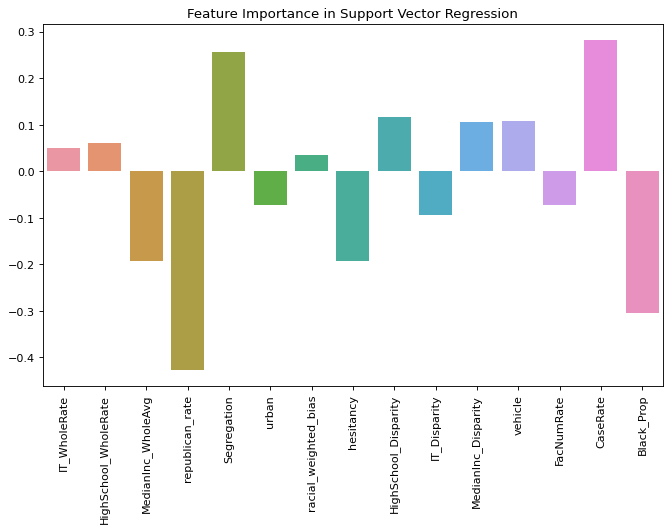

In [132]:
# model_svr.coef_.tolist()[0]
feature_importance_svr = model_svr.coef_.tolist()[0]
plt.figure(figsize=(10, 6), dpi=80)
ax = sns.barplot(x = features, y = feature_importance_svr)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Feature Importance in Support Vector Regression")
plt.show()

**LASSO Regression**

In [153]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1,random_state = 123)
clf.fit(X_train,Y_train)
Y_pred_lasso = clf.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred_lasso)
r2 = r2_score(Y_test, Y_pred_lasso)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The R-squared score on test set: {:.4f}".format(r2))

The mean squared error (MSE) on test set: 0.7107
The R-squared score on test set: 0.2893


[ 0.08465344  0.          0.         -0.13813757  0.28107755 -0.
 -0.         -0.10814025  0.0812457  -0.          0.01397312  0.
 -0.          0.11336978 -0.04766438]


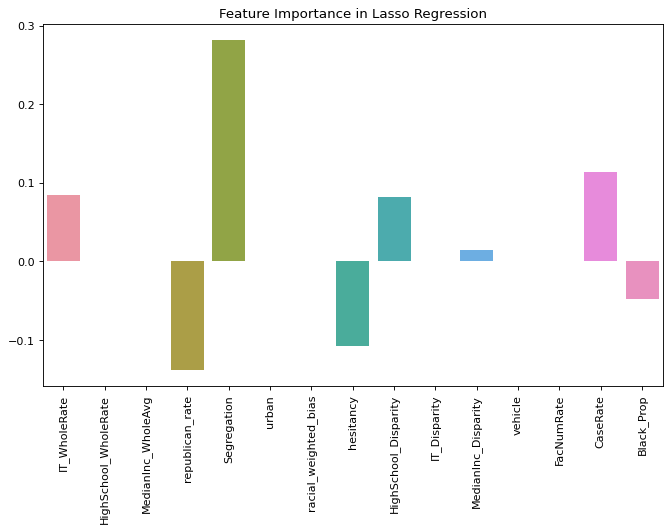

In [154]:
print(clf.coef_)
feature_importance_lasso = clf.coef_.tolist()
plt.figure(figsize=(10, 6), dpi=80)
ax = sns.barplot(x = features, y = feature_importance_lasso)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Feature Importance in Lasso Regression")
plt.show()

**Neural Networks**

In [157]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [173]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'leaky_relu', input_dim = 15))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'leaky_relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'linear'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 16, epochs = 50)

Epoch 1/50
34/34 [==============================] - 0s 1ms/step - loss: 0.9993 - mean_squared_error: 0.9993
Epoch 2/50
34/34 [==============================] - 0s 1ms/step - loss: 0.9573 - mean_squared_error: 0.9573
Epoch 3/50
34/34 [==============================] - 0s 1ms/step - loss: 0.7629 - mean_squared_error: 0.7629
Epoch 4/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6224 - mean_squared_error: 0.6224
Epoch 5/50
34/34 [==============================] - 0s 1ms/step - loss: 0.5684 - mean_squared_error: 0.5684
Epoch 6/50
34/34 [==============================] - 0s 1ms/step - loss: 0.5498 - mean_squared_error: 0.5498
Epoch 7/50
34/34 [==============================] - 0s 1ms/step - loss: 0.5320 - mean_squared_error: 0.5320
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 0.5188 - mean_squared_error: 0.5188
Epoch 9/50
34/34 [==============================] - 0s 1ms/step - loss: 0.5078 - mean_squared_error: 0.5078
Epoch 10/50
34/34 [=========

In [174]:
Y_pred_ann = classifier.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred_ann)
r2 = r2_score(Y_test, Y_pred_ann)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The R-squared score on test set: {:.4f}".format(r2))


The mean squared error (MSE) on test set: 0.5827
The R-squared score on test set: 0.4173
